# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

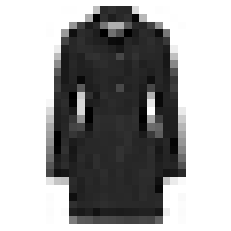

In [8]:
plt.imshow(X_train[7], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
y_train[0]

4

In [12]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

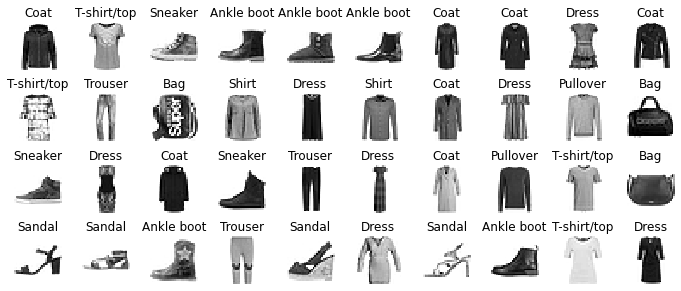

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.06653132, -0.03858468, -0.01504638, ..., -0.03771032,
         0.04066198,  0.00254873],
       [ 0.01302691, -0.05747939,  0.06384537, ..., -0.03418824,
         0.03263447, -0.07303225],
       [-0.0463521 ,  0.06158972,  0.03242886, ...,  0.06861545,
         0.04413609,  0.05364056],
       ...,
       [ 0.03064   , -0.00104158, -0.05126704, ..., -0.04648703,
        -0.02082727,  0.04970416],
       [-0.05715711, -0.00588703, -0.05622153, ..., -0.04791021,
        -0.03157366, -0.02438148],
       [-0.05976208, -0.02477442,  0.05204061, ..., -0.03168809,
         0.01096264, -0.02006799]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [30]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7053 - accuracy: 0.7651 - val_loss: 0.5034 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4832 - accuracy: 0.8326 - val_loss: 0.4814 - val_accuracy: 0.8266
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4400 - accuracy: 0.8462 - val_loss: 0.4202 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4126 - accuracy: 0.8566 - val_loss: 0.4020 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3930 - accuracy: 0.8619 - val_loss: 0.3995 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3778 - accuracy: 0.8671 - val_loss: 0.4104 - val_accuracy: 0.8528
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3645 - accuracy: 0.8713 - val_loss: 0.3788 - val_accurac

In [31]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

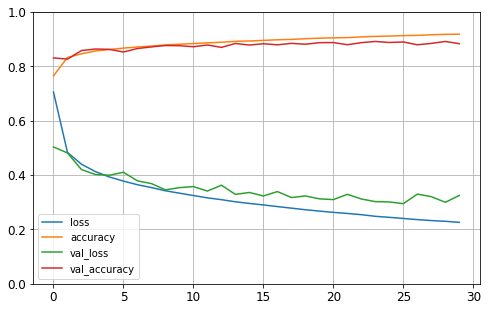

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8711


[0.3508341908454895, 0.8711000084877014]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict(X_new)
y_predx=np.argmax(y_pred,axis=1)
y_predx

array([9, 2, 1])

In [38]:
np.array(class_names)[y_predx]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

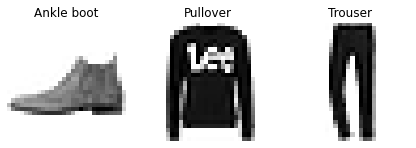

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

Question 1


Adam optimizer

In [41]:
model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4847 - accuracy: 0.8260 - val_loss: 0.3700 - val_accuracy: 0.8688
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3647 - accuracy: 0.8653 - val_loss: 0.3333 - val_accuracy: 0.8814
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3310 - accuracy: 0.8773 - val_loss: 0.3417 - val_accuracy: 0.8762
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3043 - accuracy: 0.8870 - val_loss: 0.3344 - val_accuracy: 0.8770
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2860 - accuracy: 0.8923 - val_loss: 0.3332 - val_accuracy: 0.8804
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2705 - accuracy: 0.8985 - val_loss: 0.3042 - val_accuracy: 0.8898
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2605 - accuracy: 0.9018 - val_loss: 0.3226 - val_accuracy:

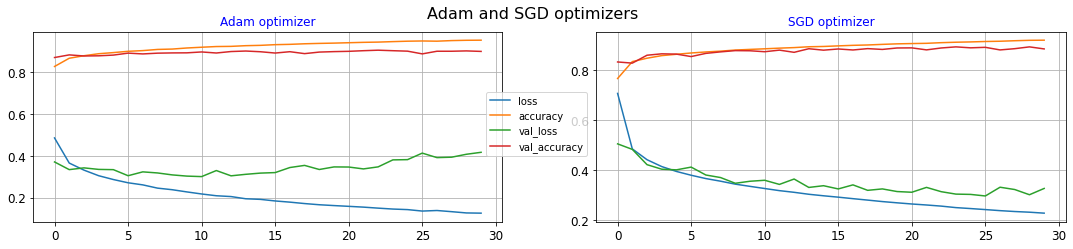

In [42]:
import pandas as pd

data = pd.DataFrame(history.history)
data_1= pd.DataFrame(history_1.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('Adam and SGD optimizers', fontsize=16)


ax1.plot(data_1)
ax1.set_title('Adam optimizer', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('SGD optimizer', color='blue')
ax2.grid(True)
ax2.set

f.legend(data_1.columns, loc='center')
plt.show()

Question 2



In [43]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, batch_size=15, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3667/3667 [==============================] - 14s 4ms/step - loss: 0.6205 - accuracy: 0.7885 - val_loss: 0.4706 - val_accuracy: 0.8328
Epoch 2/30
3667/3667 [==============================] - 14s 4ms/step - loss: 0.4416 - accuracy: 0.8449 - val_loss: 0.5053 - val_accuracy: 0.8064
Epoch 3/30
3667/3667 [==============================] - 14s 4ms/step - loss: 0.3975 - accuracy: 0.8587 - val_loss: 0.3752 - val_accuracy: 0.8724
Epoch 4/30
3667/3667 [==============================] - 14s 4ms/step - loss: 0.3690 - accuracy: 0.8689 - val_loss: 0.3696 - val_accuracy: 0.8676
Epoch 5/30
3667/3667 [==============================] - 14s 4ms/step - loss: 0.3487 - accuracy: 0.8744 - val_loss: 0.3746 - val_accuracy: 0.8680
Epoch 6/30
3667/3667 [==============================] - 14s 4ms/step - loss: 0.3324 - accuracy: 0.8805 - val_loss: 0.3570 - val_accuracy: 0.8720
Epoch 7/30
3667/3667 [==============================] - 14s 4ms/step - loss: 0.3180 - accuracy: 0.8853 - val_loss: 0.3435 - val_ac

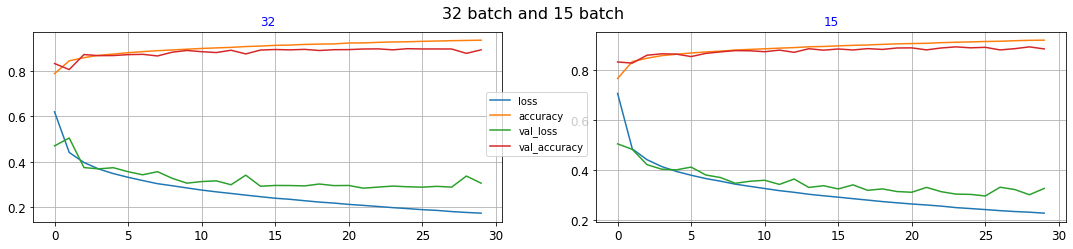

In [44]:

data = pd.DataFrame(history.history)
data_2= pd.DataFrame(history_2.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('32 batch and 15 batch', fontsize=16)

ax1.plot(data_2)
ax1.set_title('32', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('15', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()

Question 3


In [45]:
model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, batch_size=32, epochs=17,
                    validation_data=(X_valid, y_valid))

Epoch 1/17
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7091 - accuracy: 0.7664 - val_loss: 0.5168 - val_accuracy: 0.8236
Epoch 2/17
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4890 - accuracy: 0.8284 - val_loss: 0.4367 - val_accuracy: 0.8516
Epoch 3/17
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4434 - accuracy: 0.8447 - val_loss: 0.4259 - val_accuracy: 0.8510
Epoch 4/17
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4148 - accuracy: 0.8532 - val_loss: 0.3916 - val_accuracy: 0.8664
Epoch 5/17
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3936 - accuracy: 0.8604 - val_loss: 0.3761 - val_accuracy: 0.8704
Epoch 6/17
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3787 - accuracy: 0.8655 - val_loss: 0.3749 - val_accuracy: 0.8684
Epoch 7/17
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3648 - accuracy: 0.8701 - val_loss: 0.3657 - val_accuracy:

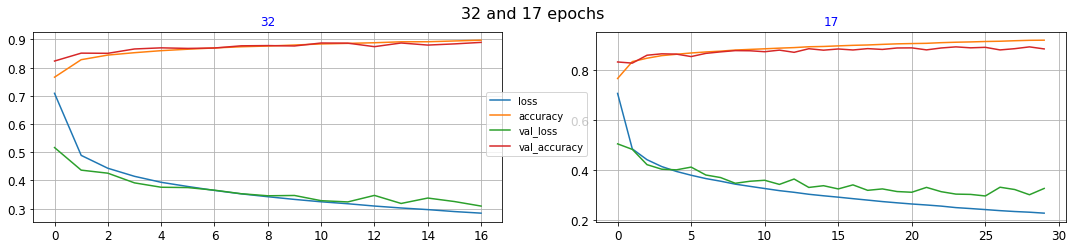

In [46]:
data = pd.DataFrame(history.history)
data_3= pd.DataFrame(history_3.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('32 and 17 epochs', fontsize=16)


ax1.plot(data_3)
ax1.set_title('32', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('17', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()

Question 4


In [47]:
from keras.layers import Dropout

In [48]:
model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    #Add droupout on hidden layers
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7878 - accuracy: 0.7359 - val_loss: 0.5266 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5251 - accuracy: 0.8174 - val_loss: 0.4657 - val_accuracy: 0.8362
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4701 - accuracy: 0.8345 - val_loss: 0.4159 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4351 - accuracy: 0.8460 - val_loss: 0.3995 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4132 - accuracy: 0.8537 - val_loss: 0.3765 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3927 - accuracy: 0.8598 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3790 - accuracy: 0.8646 - val_loss: 0.3589 - val_accuracy:

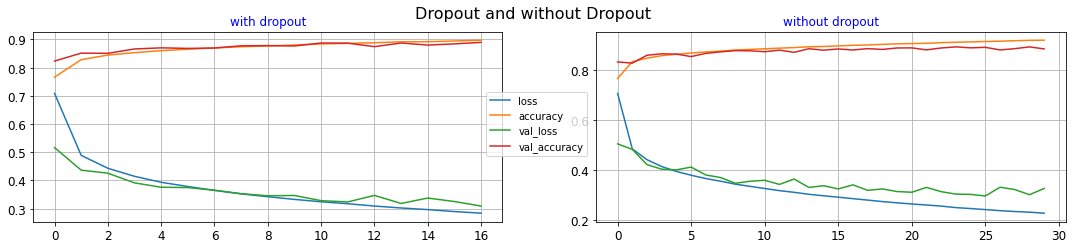

In [49]:
data = pd.DataFrame(history.history)
data_4= pd.DataFrame(history_3.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('Dropout and without Dropout', fontsize=16)


ax1.plot(data_4)
ax1.set_title('with dropout', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('without dropout', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()

Question 5

In [50]:
model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    #Add BatchNormalization layers
    keras.layers.BatchNormalization(input_shape=(2,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5305 - accuracy: 0.8143 - val_loss: 0.3970 - val_accuracy: 0.8618
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3868 - accuracy: 0.8607 - val_loss: 0.3808 - val_accuracy: 0.8636
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3520 - accuracy: 0.8727 - val_loss: 0.3319 - val_accuracy: 0.8824
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3271 - accuracy: 0.8810 - val_loss: 0.3309 - val_accuracy: 0.8774
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3092 - accuracy: 0.8875 - val_loss: 0.3333 - val_accuracy: 0.8804
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2941 - accuracy: 0.8933 - val_loss: 0.3380 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2799 - accuracy: 0.8974 - val_loss: 0.3146 - val_accuracy:

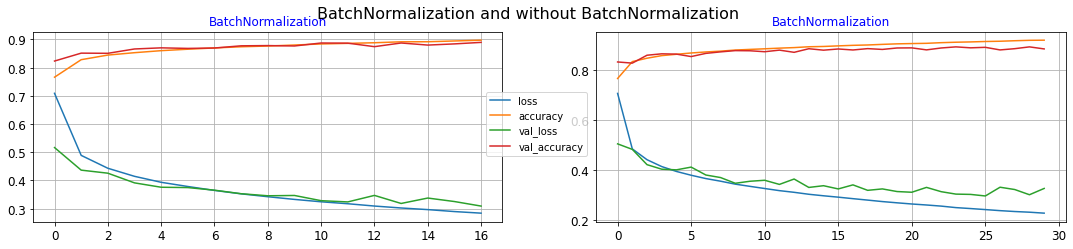

In [51]:
data = pd.DataFrame(history.history)
data_4= pd.DataFrame(history_3.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 3.5)
f.suptitle('BatchNormalization and without BatchNormalization  ', fontsize=16)


ax1.plot(data_4)
ax1.set_title('BatchNormalization', color='blue')
ax1.grid(True)

ax2.plot(data)
ax2.set_title('BatchNormalization', color='blue')
ax2.grid(True)

f.legend(data.columns, loc='center')
plt.show()